In [1]:
pip install numpy matplotlib


In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [16]:
I = np.array([[1, 0], [0, 1]])  # Identity Gate
X = np.array([[0, 1], [1, 0]])  # Pauli-X Gate
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard Gate
CNOT = np.array([[1, 0, 0, 0],  # CNOT Gate
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])


In [17]:
def statevector(num_qubits):
  state = np.array([1,0])

  for i in range(num_qubits-1):
    state = np.kron(state, np.array([1,0]))
  return state

In [18]:
def apply_gate(state, gate, qubit, num_qubits):
    """Apply a gate to the specified qubit in the statevector."""
    full_gate = I if qubit != 0 else gate
    for i in range(1, num_qubits):
        full_gate = np.kron(full_gate, gate if i == qubit else I)
    return np.dot(full_gate, state)


Initial state vector: [1 0 0 0]
State after applying X to qubit 0: [0 0 1 0]
State after applying Hadamard to qubit 1: [0.         0.         0.70710678 0.70710678]


In [21]:
def simulate_circuit(num_qubits):
    """Simulate a circuit with Hadamard and X gates."""
    # Initialize the statevector |0>^n
    state = initialize_state(num_qubits)

    # Apply a Hadamard gate to the first qubit
    state = apply_gate(state, H, 0, num_qubits)

    # Apply an X gate to the second qubit, if present
    if num_qubits > 1:
        state = apply_gate(state, X, 1, num_qubits)

    return state


In [22]:
# Number of qubits in the system
n = 2

# Initialize the state vector for 2 qubits: |00⟩
state = statevector(n)
print("Initial state vector:", state)

# Apply X gate to the first qubit (qubit 0)
state = apply_gate(state, X, 0, n)
print("State after applying X to qubit 0:", state)

# Apply Hadamard gate to the second qubit (qubit 1)
state = apply_gate(state, H, 1, n)
print("State after applying Hadamard to qubit 1:", state)


Initial state vector: [1 0 0 0]
State after applying X to qubit 0: [0 0 1 0]
State after applying Hadamard to qubit 1: [0.         0.         0.70710678 0.70710678]


In [10]:
def measure_runtime(max_qubits):
    """Measure runtime as a function of the number of qubits."""
    runtimes = []
    qubits = list(range(1, max_qubits + 1))

    for n in qubits:
        start_time = time.time()
        simulate_circuit(n)
        runtime = time.time() - start_time
        runtimes.append(runtime)

    return qubits, runtimes


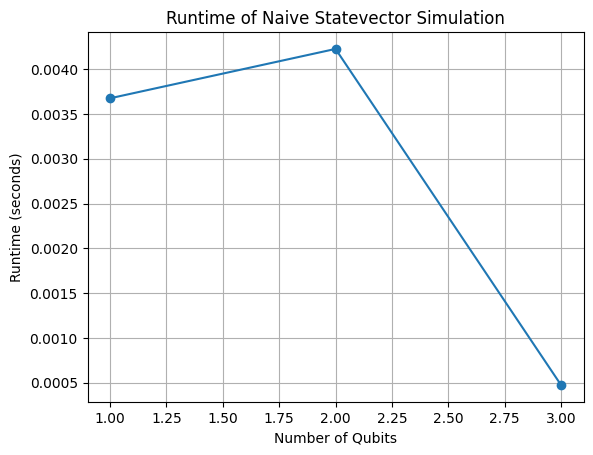

In [11]:
max_qubits = 3  # Adjust based on your machine's limits
qubits, runtimes = measure_runtime(max_qubits)

plt.plot(qubits, runtimes, marker='o')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime of Naive Statevector Simulation')
plt.grid(True)
plt.show()
